<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_3/ds_mod3_lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fbprophet import Prophet

In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import date
import seaborn as sns
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'
dados = pd.read_csv(url, sep=";", parse_dates=[4])
dados_sp = dados.query("nome_munic == 'São Paulo'")
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()
dados_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,media_movel_casos,media_movel_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,NaN,NaN
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,NaN,NaN
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,NaN,NaN
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,NaN,NaN


In [3]:
df = pd.DataFrame()

In [4]:
df['ds'] = dados_sp['datahora']
df['y'] = dados_sp['casos_novos']

In [5]:
modelo = Prophet()

In [6]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [8]:
dataframefuturo.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [9]:
previsao = modelo.predict(dataframefuturo)

In [10]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-114.303728,-765.665673,1611.914759,-114.303728,-114.303728,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,386.013224
1,2020-02-26,-96.932780,-716.413175,1638.424328,-96.932780,-96.932780,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,457.834930
2,2020-02-27,-79.561833,-655.940028,1721.143478,-79.561833,-79.561833,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,571.148167
3,2020-02-28,-62.190885,-889.050449,1464.675081,-62.190885,-62.190885,368.442066,368.442066,368.442066,368.442066,368.442066,368.442066,0.0,0.0,0.0,306.251181
4,2020-02-29,-44.819937,-1162.350409,1203.751393,-44.819937,-44.819937,30.824737,30.824737,30.824737,30.824737,30.824737,30.824737,0.0,0.0,0.0,-13.995200


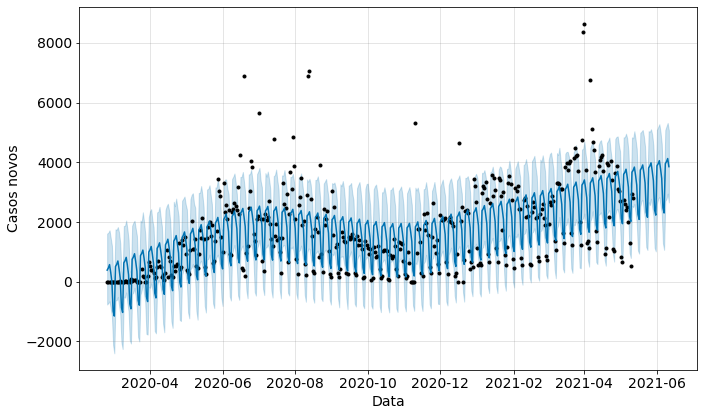

In [11]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6));

In [12]:
df = pd.DataFrame()
df['ds'] = dados_sp['datahora'][:400]
df['y'] = dados_sp['casos_novos'][:400]
modelo = Prophet()
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
dataframefuturo = modelo.make_future_dataframe(periods=30)
previsao = modelo.predict(dataframefuturo)

In [14]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

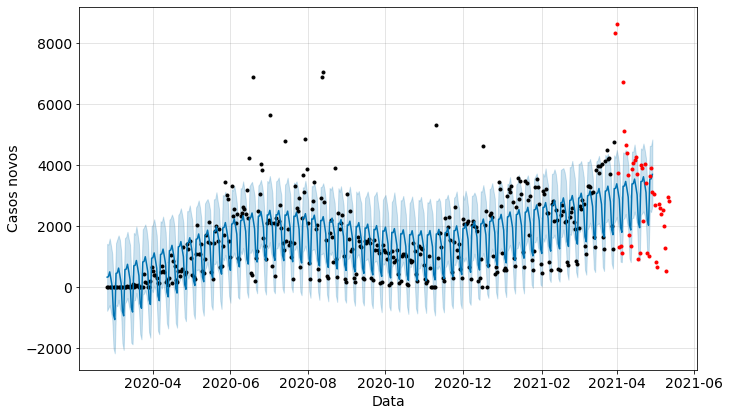

In [15]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

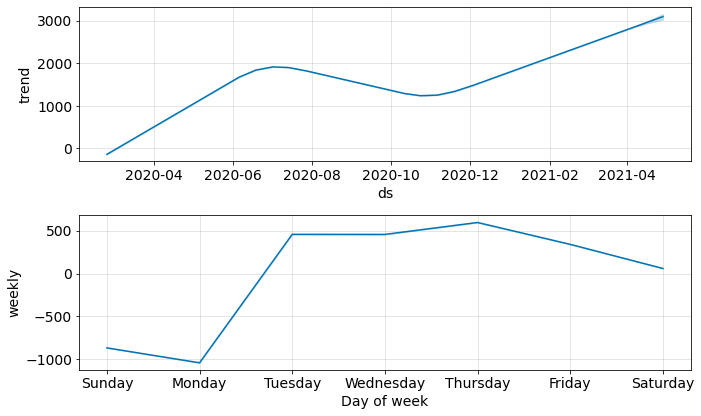

In [16]:
modelo.plot_components(previsao, figsize=(10,6));

# Desafios

## Desafio 08: Mudar os períodos de previsão.

In [29]:
df = pd.DataFrame()
cut = 380
prevision_date = 365
df['ds'] = dados_sp['datahora'][:cut]
df['y'] = dados_sp['casos_novos'][:cut]

modelo = Prophet()
modelo.fit(df)

dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
previsao = modelo.predict(dataframefuturo)

df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][cut:]
df_teste['y'] = dados_sp['casos_novos'][cut:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


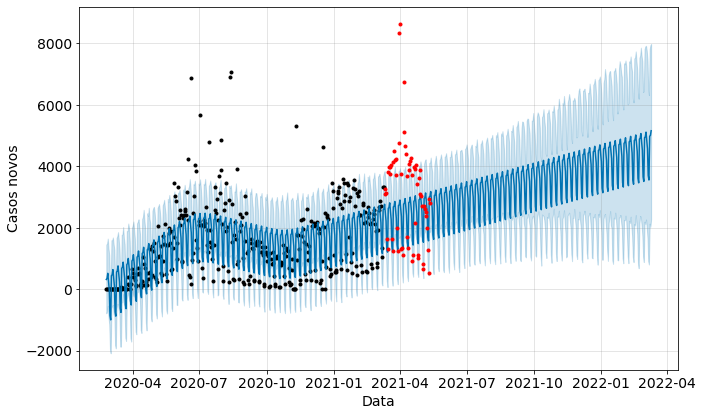

In [30]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

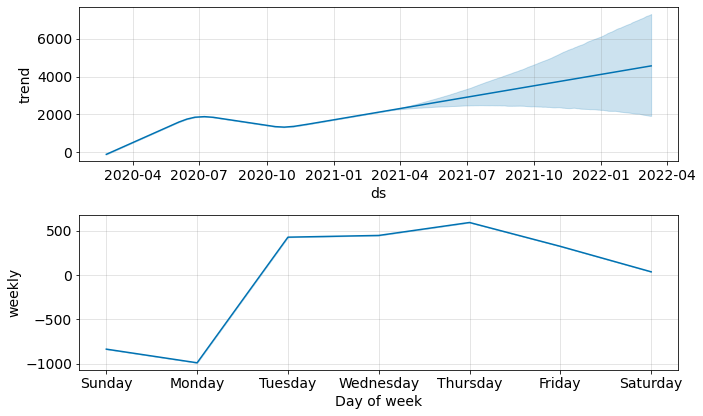

In [31]:
modelo.plot_components(previsao, figsize=(10,6));

## Desafio 09: Explorar a documentação do Prophet e melhorar os gráficos.

In [38]:
from fbprophet.plot import add_changepoints_to_plot

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


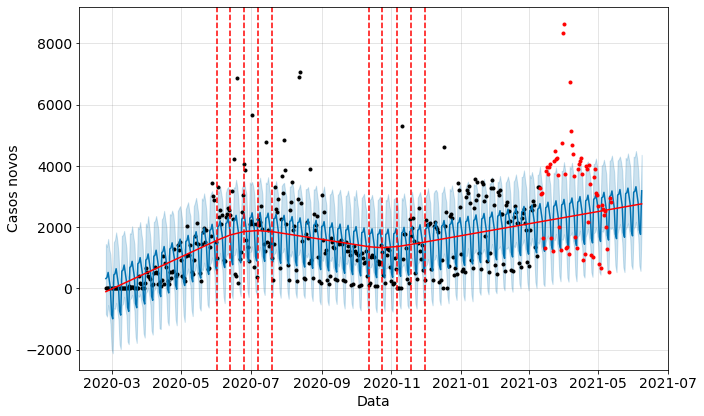

In [53]:
df = pd.DataFrame()
cut = 380
prevision_date = 90
df['ds'] = dados_sp['datahora'][:cut]
df['y'] = dados_sp['casos_novos'][:cut]
# df['cap'] = 6000
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][cut:]
df_teste['y'] = dados_sp['casos_novos'][cut:]

modelo = Prophet()#changepoints=['2021-01-01'])#growth='logistic')
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
# dataframefuturo['cap'] = 4000
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6))
plt.plot(df_teste['ds'], df_teste['y'], '.r')
add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

## Desafio 10: Fazer todo o processo de previsão para o número de casos acumulados.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


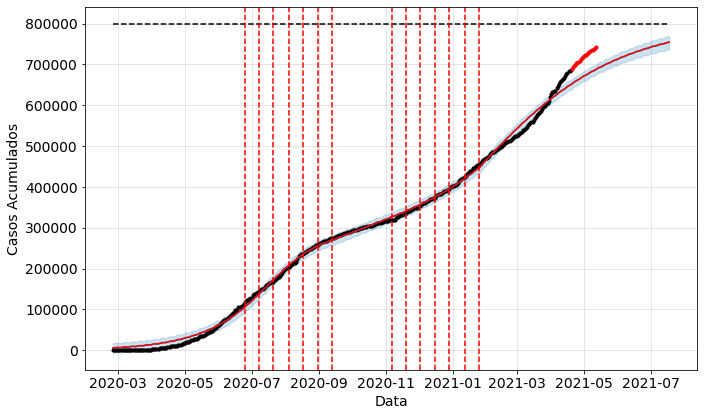

In [60]:
df = pd.DataFrame()
cut = 420
prevision_date = 90
df['ds'] = dados_sp['datahora'][:cut]
df['y'] = dados_sp['casos'][:cut]
df['cap'] = 800000
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][cut:]
df_teste['y'] = dados_sp['casos'][cut:]

modelo = Prophet(growth='logistic')
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
dataframefuturo['cap'] = 800000
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos Acumulados', figsize=(10,6))
plt.plot(df_teste['ds'], df_teste['y'], '.r')
add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()